<a href="https://colab.research.google.com/github/Vinitladse/Bank-Marketing-Effectiveness-Prediction/blob/main/Vinit_ladse(Group)_Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* age (numeric)
* job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student',  'technician','unemployed','unknown')
* marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* contact: contact communication type (categorical: 'cellular','telephone')
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
  y - has the client subscribed a term deposit? (binary: 'yes','no')


-----



In [151]:
# Importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
Data=pd.read_csv('/content/drive/MyDrive/dataset/bank-full.csv',sep=';')
df = Data.copy()

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [10]:
# Shape of the Dataset
df.shape

(45211, 17)

We have 4521 rows and 17 columns in our banking dataset.

In [11]:
# Information About Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## **Checking null values**

In [13]:
# checking the null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no null values in the dataset

In [14]:
# checking unique values
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [15]:
# checking the duplicate values in our data
df.duplicated().value_counts()

False    45211
dtype: int64

In [16]:
# Summary Statastics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [17]:
df.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


##**Target Variable**

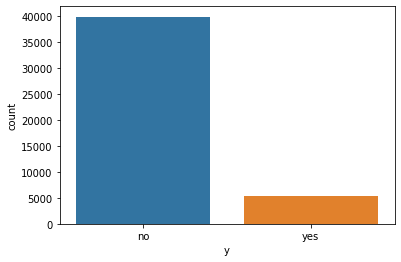

In [18]:
# Visualize the target variable
g = sns.countplot(df['y'])

As We Can See that Data is highly imbalanced.

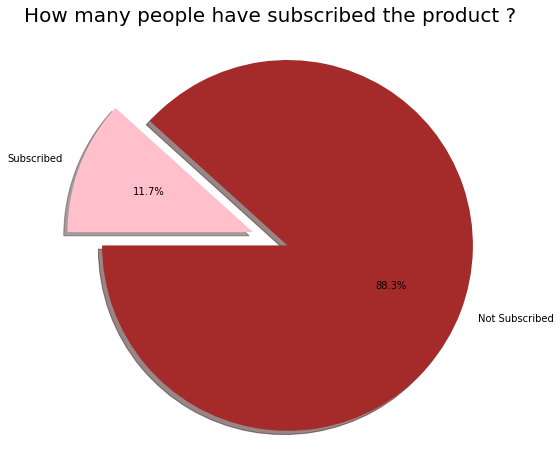

In [19]:
# visualising how many customers have subscribed

labels = 'Not Subscribed', 'Subscribed' 
sizes = df.y.value_counts()
colors = ['brown', 'pink']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("How many people have subscribed the product ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()


Only 11.7% people have subscribed to our product

In [20]:
# List of numeric columns
numerical_columns = list(df.select_dtypes(exclude=['object']))
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [21]:
# List of Categorical columns
categorical_columns = list(df.select_dtypes(include=['object']))
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

# **Bar Graph Representation of Each Variable**

##Categorical Features Exploration

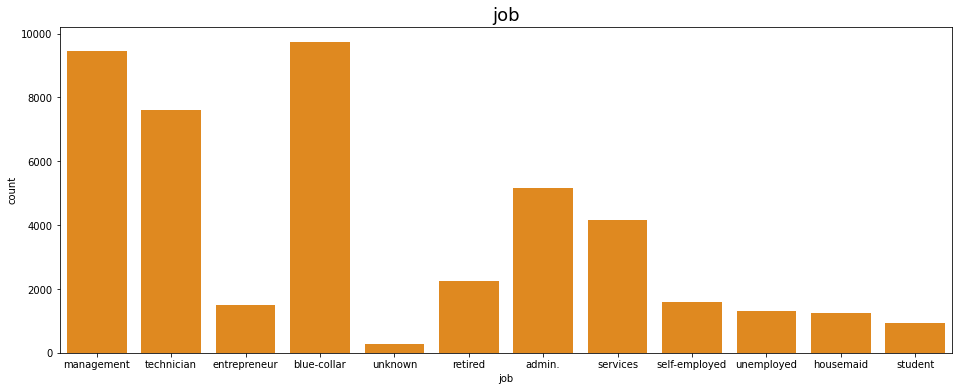

In [22]:
plt.figure(figsize = (16,6))
sns.countplot(df['job'],color = 'DarkOrange')
plt.title('job', fontsize=18)
plt.show()

We have type of job :- (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’).

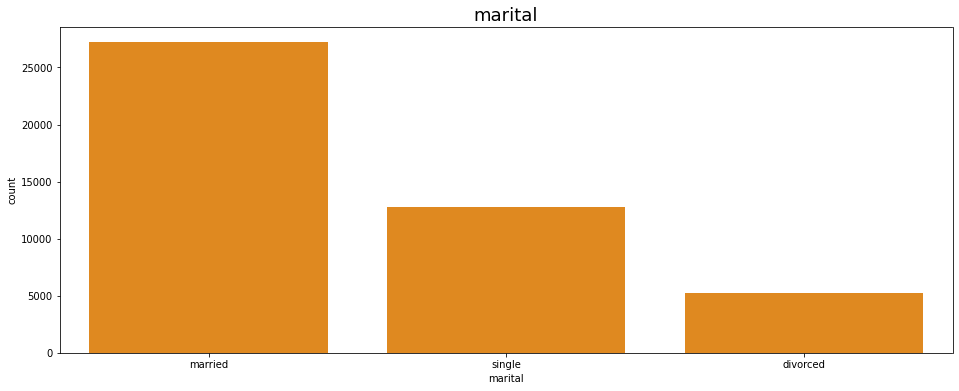

In [23]:
plt.figure(figsize = (16,6))
sns.countplot(df['marital'], color = 'DarkOrange')
plt.title('marital', fontsize=18)
plt.show()


marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)

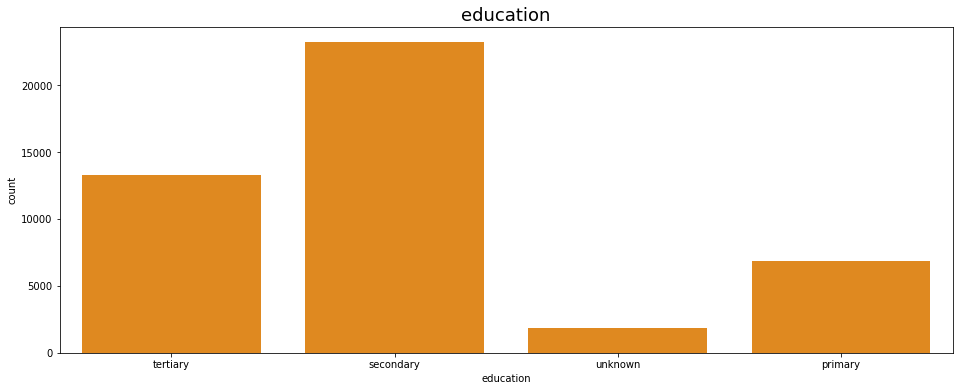

In [24]:
plt.figure(figsize = (16,6))
sns.countplot(df['education'], color = 'DarkOrange')
plt.title('education', fontsize=18)
plt.show()

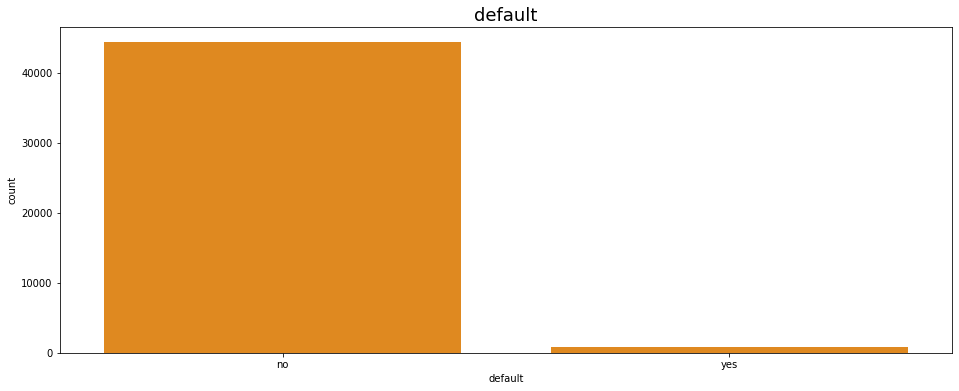

In [25]:
plt.figure(figsize = (16,6))
sns.countplot(df['default'], color = 'DarkOrange')
plt.title('default', fontsize=18)
plt.show()

Column default says that client has credit in default or not. It has categorical value: ‘no’,’yes’,’unknown’

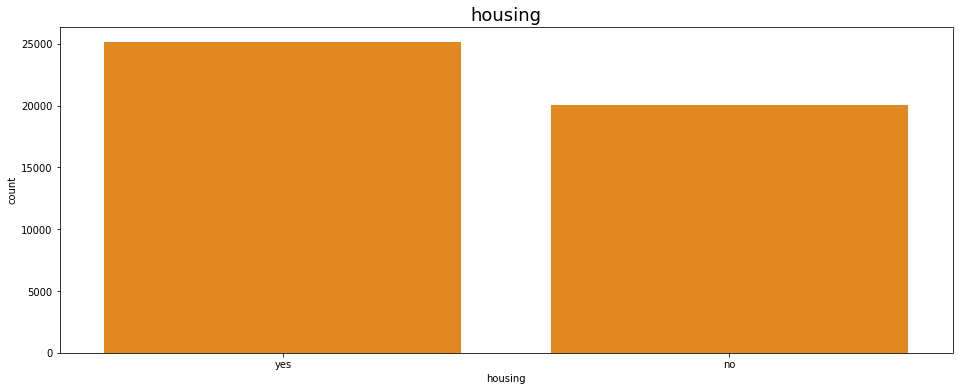

In [26]:
plt.figure(figsize = (16,6))
sns.countplot(df['housing'], color = 'DarkOrange')
plt.title('housing', fontsize=18)
plt.show()

Most of the client has taken the housing loan.

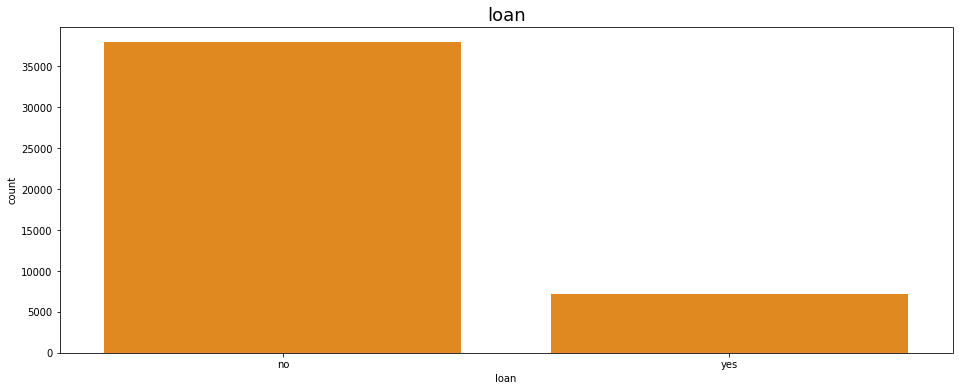

In [27]:
plt.figure(figsize = (16,6))
sns.countplot(df['loan'], color = 'DarkOrange')
plt.title('loan', fontsize=18)
plt.show()

As per data, some client has taken the personal loan.

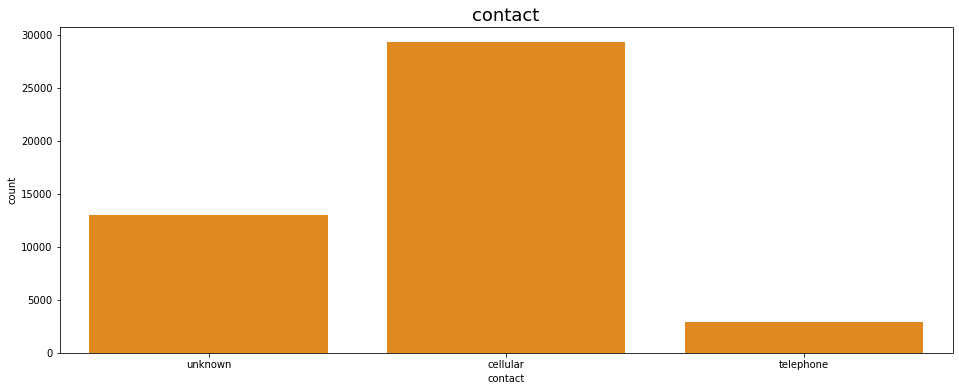

In [28]:
plt.figure(figsize = (16,6))
sns.countplot(df['contact'], color = 'DarkOrange')
plt.title('contact', fontsize=18)
plt.show()

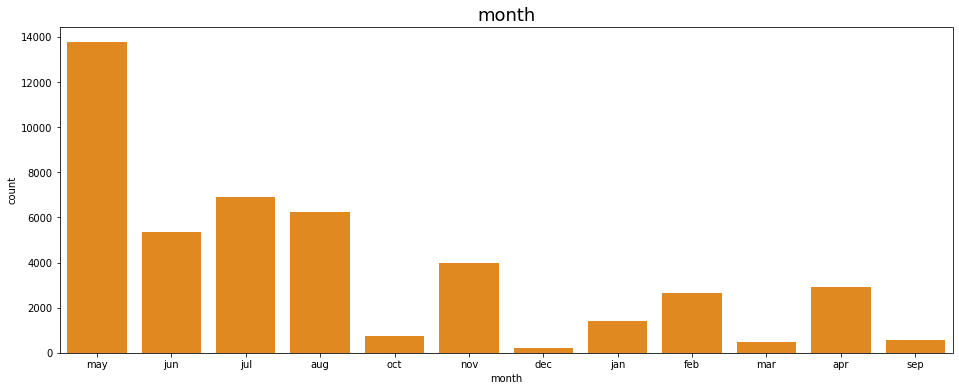

In [29]:
plt.figure(figsize = (16,6))
sns.countplot(df['month'], color = 'DarkOrange')
plt.title('month', fontsize=18)
plt.show()

month :- last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

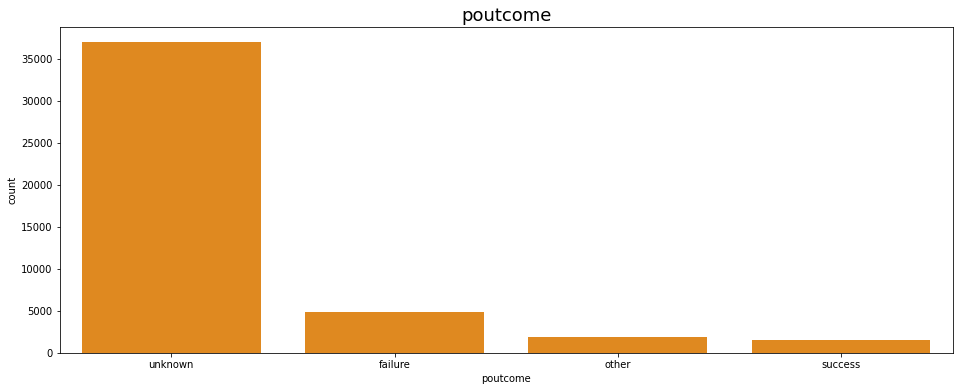

In [30]:
plt.figure(figsize = (16,6))
sns.countplot(df['poutcome'], color = 'DarkOrange')
plt.title('poutcome', fontsize=18)
plt.show()

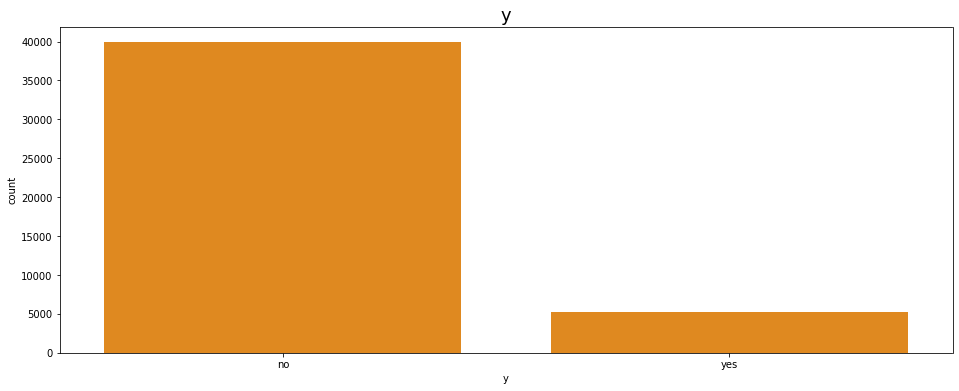

In [31]:
plt.figure(figsize = (16,6))
sns.countplot(df['y'], color = 'DarkOrange')
plt.title('y', fontsize=18)
plt.show()

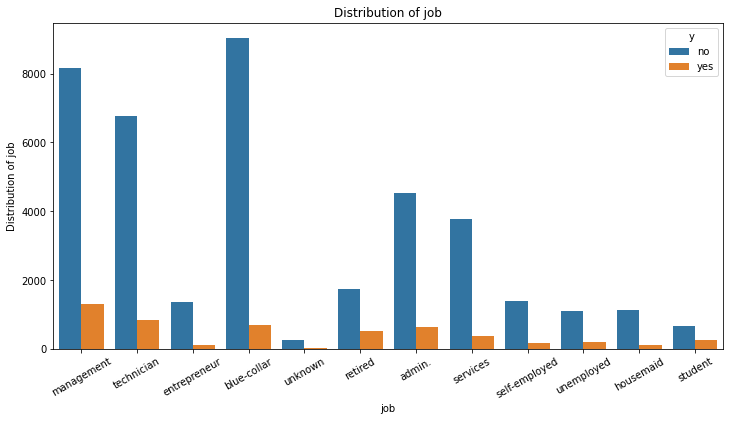

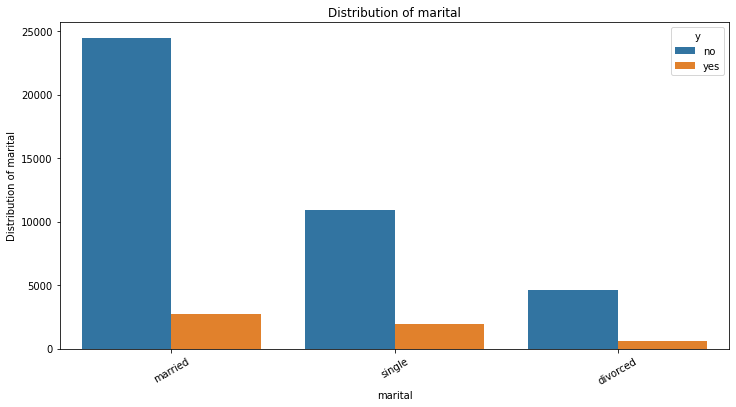

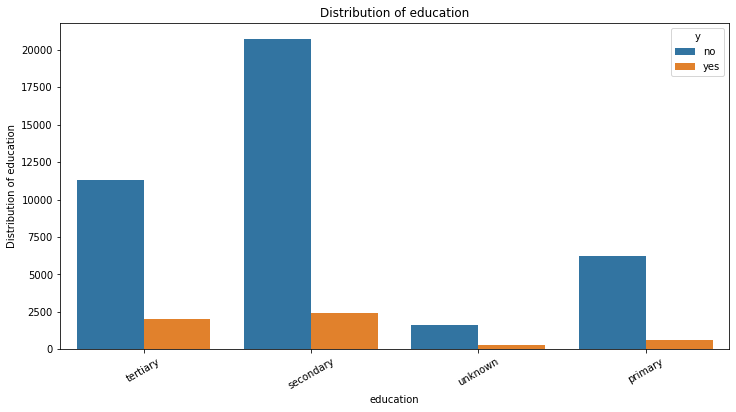

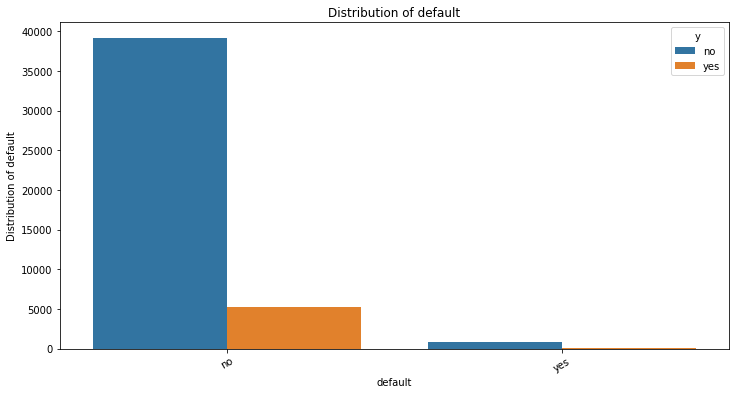

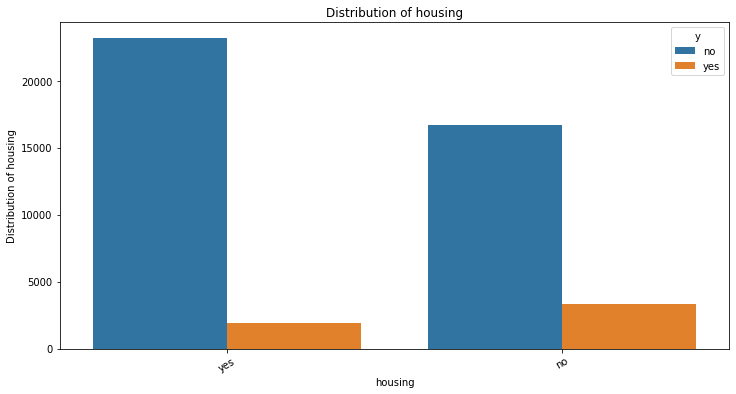

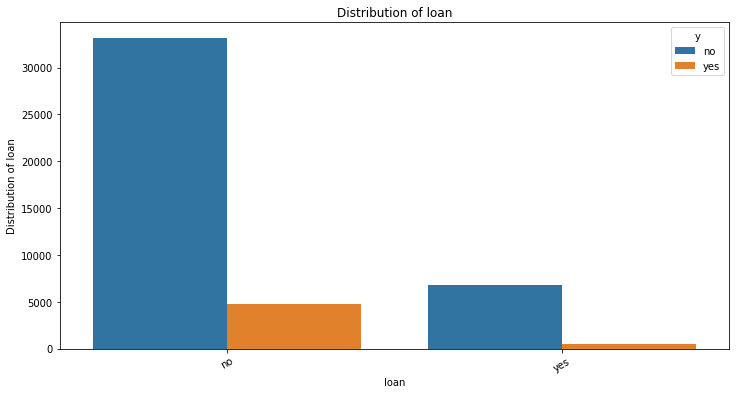

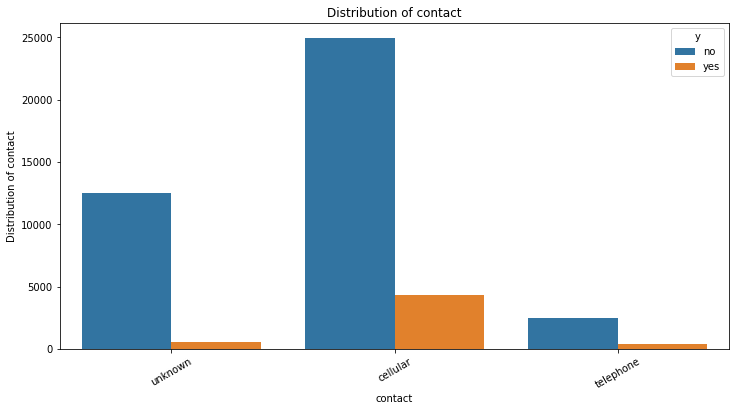

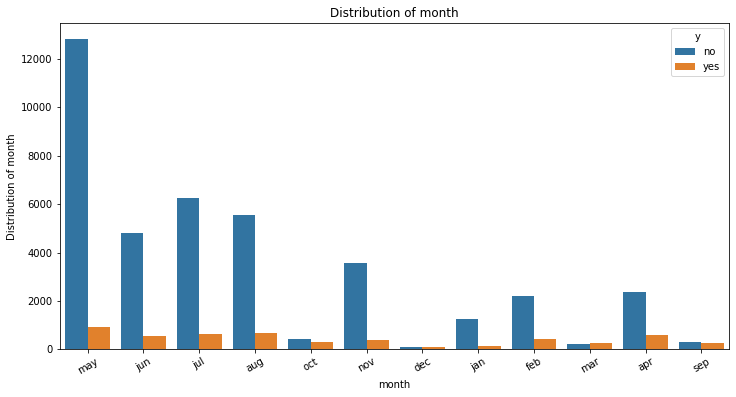

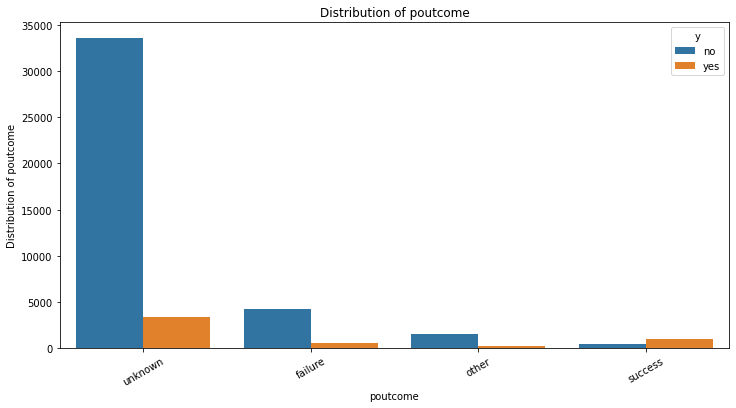

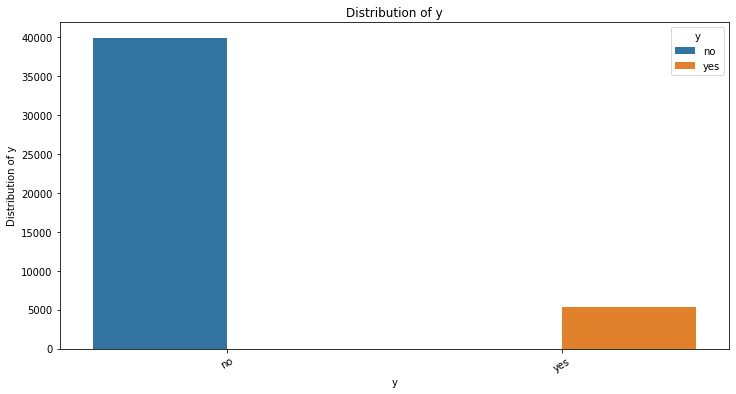

In [32]:
# Countplot of categorical features

for col in categorical_columns:
  plt.figure(figsize = (12,6))
  sns.countplot(x = df[col] , hue=df['y'])
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.ylabel('Distribution of {}'.format(col))
  plt.title("Distribution of {}".format(col))
  plt.xticks(rotation=30)
  plt.show()

## Numerical Column Exploration

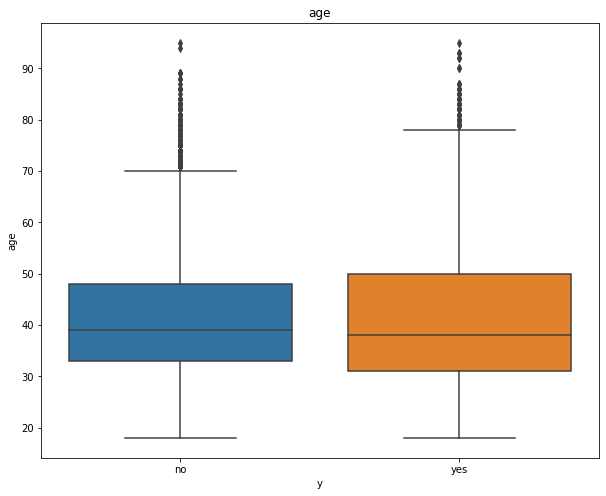

In [33]:
# bar plot of numerical feature

plt.figure(figsize=(10,8))
sns.boxplot(y=df['age'], x=df['y'])
plt.title('age')
plt.xlabel('y')
plt.show()

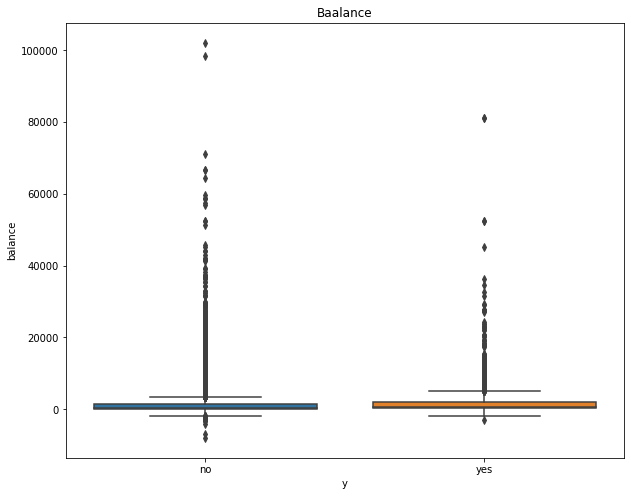

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['balance'], x=df['y'])
plt.title('Baalance')
plt.xlabel('y')
plt.show()

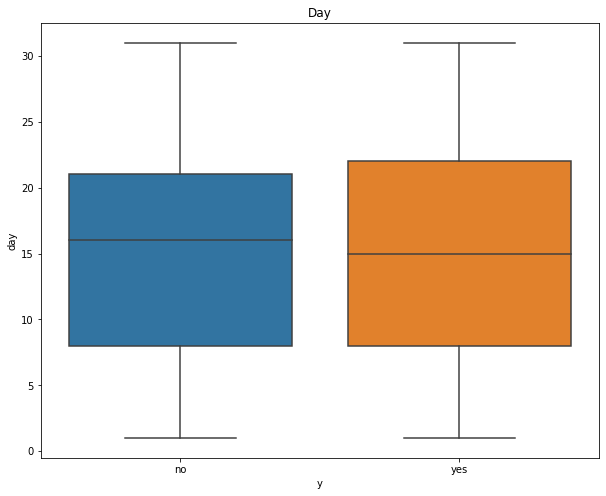

In [35]:

plt.figure(figsize=(10,8))
sns.boxplot(y=df['day'], x=df['y'])
plt.title('Day')
plt.xlabel('y')
plt.show()

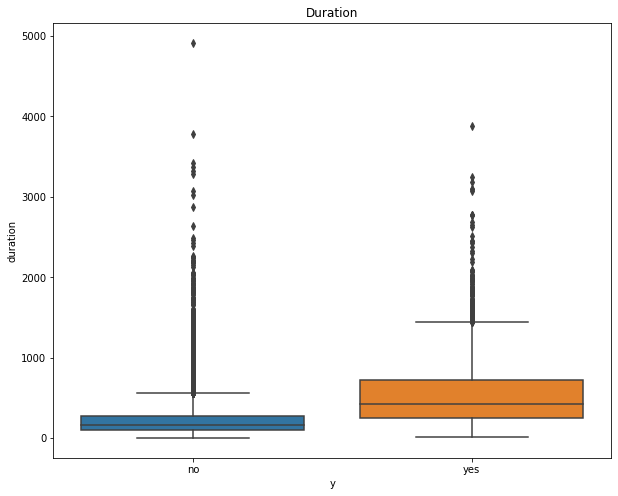

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['duration'], x=df['y'])
plt.title('Duration')
plt.xlabel('y')
plt.show()

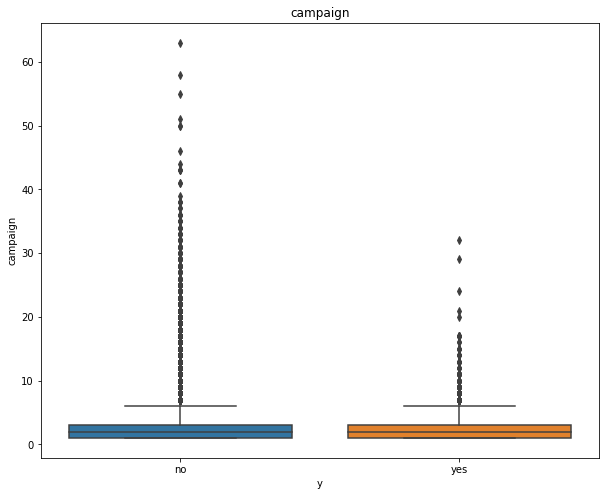

In [37]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['campaign'], x=df['y'])
plt.title('campaign')
plt.xlabel('y')
plt.show()

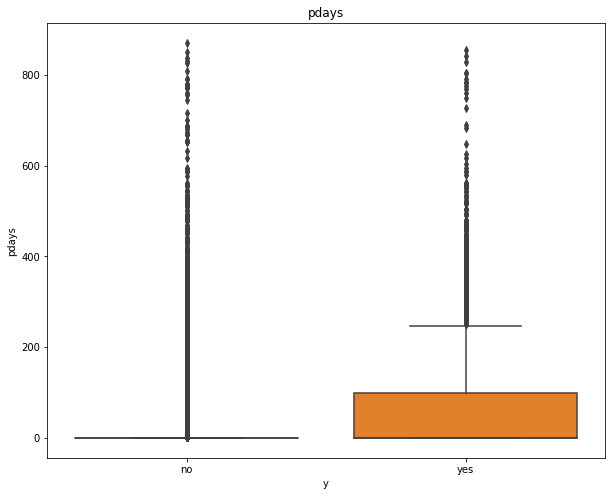

In [38]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['pdays'], x=df['y'])
plt.title('pdays')
plt.xlabel('y')
plt.show()

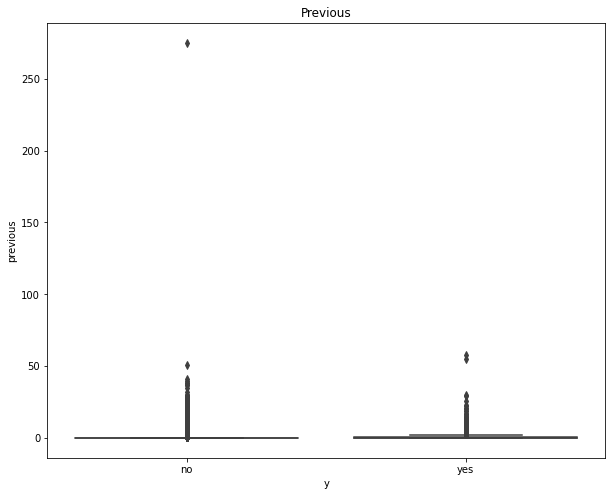

In [39]:



plt.figure(figsize=(10,8))
sns.boxplot(y=df['previous'], x=df['y'])
plt.title('Previous')
plt.xlabel('y')
plt.show()

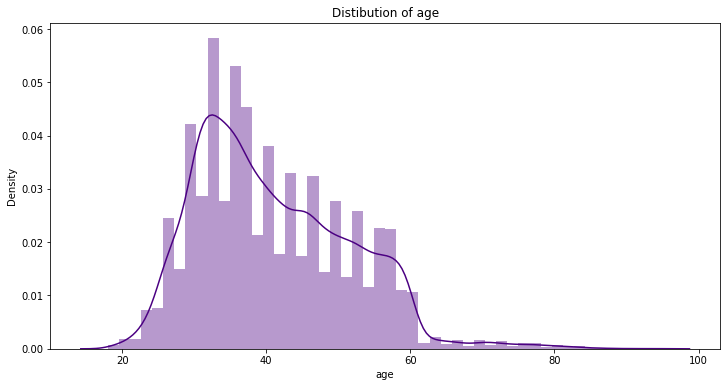

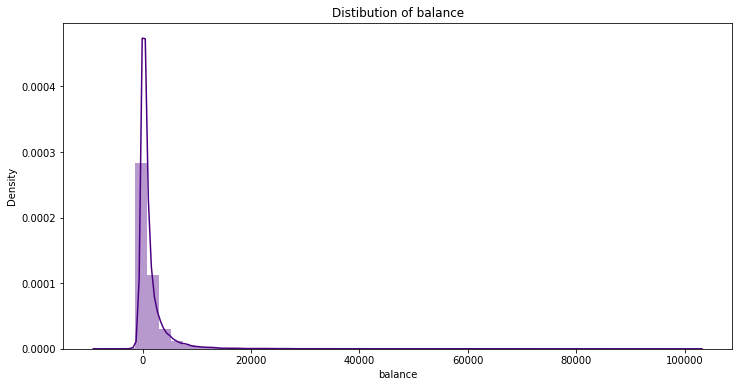

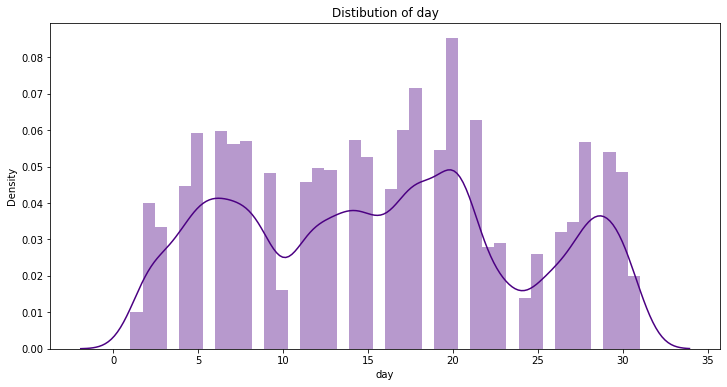

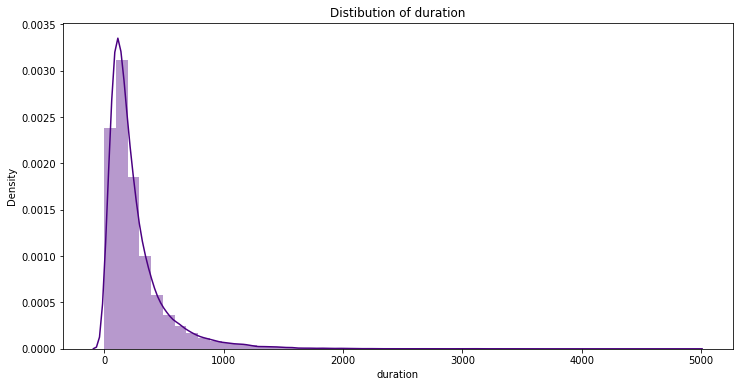

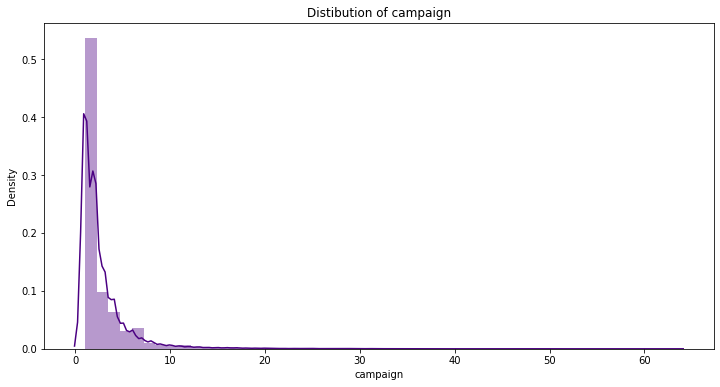

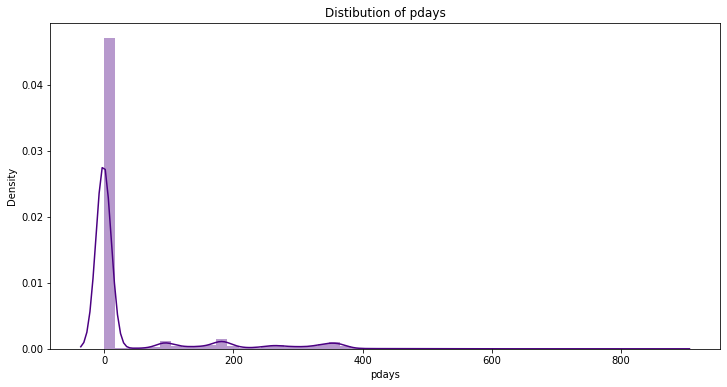

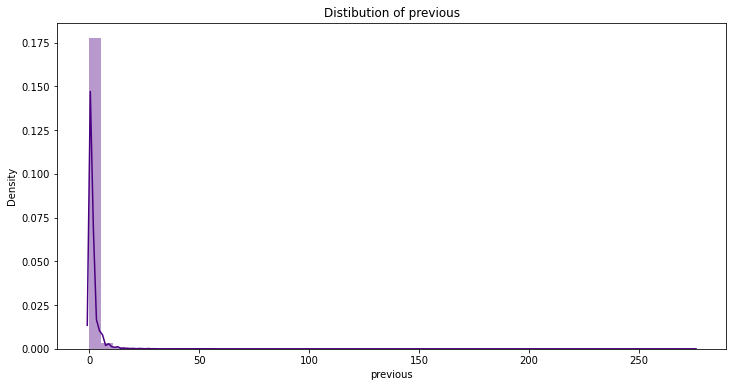

In [40]:

# Distibution plot of Numerical features
for col in numerical_columns:
  plt.figure(figsize=(12,6))
  sns.distplot(df[col], color='indigo')
  plt.title('Distibution of {}'. format(col))
  plt.show()

In [41]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


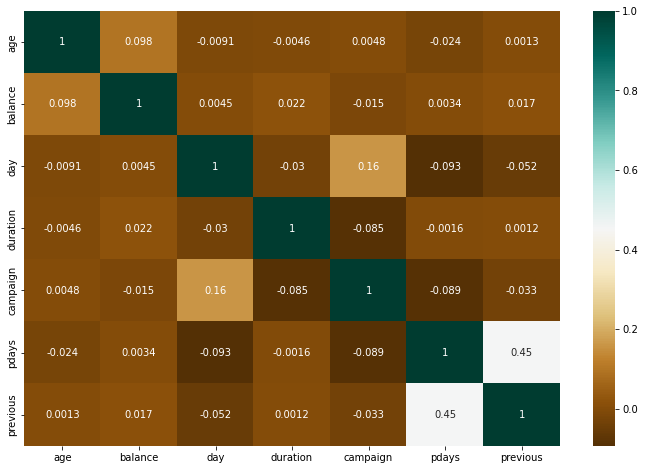

In [42]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap ='BrBG')

In [43]:
df.shape

(45211, 17)

In [44]:

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


-- Creating one-hot encoding for non-numeric marital column

In [45]:
marital_dummies = pd.get_dummies(df['marital'], prefix= 'marital')
marital_dummies.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [46]:
# merge marital_dummies with marital column

pd.concat([df['marital'], marital_dummies], axis = 1).head()

,marital,marital_divorced,marital_married,marital_single
0,married,0,1,0
1,single,0,0,1
2,married,0,1,0
3,married,0,1,0
4,single,0,0,1


We can see in each of the rows there is one value of 1, which is in the column corresponding the value in the marital column.

There are three values, if two of the values in the dummy columns are 0 for a particular row, then the remaining column must be equal to 1. It is important to eliminate any redundancy and correlations in features as it becomes difficult to determine which feature is most important in minimizing the total error.

So let us remove one column divorced.

In [47]:
# Remove marital_divorced column
marital_dummies.drop('marital_divorced', axis =1, inplace = True)
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [48]:
# merge marital_dummies into main dataframe

df = pd.concat([df, marital_dummies], axis = 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,1


-- Creating one hot encoding for job column

In [49]:
job_dummies = pd.get_dummies(df['job'], prefix= 'job')
job_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
job_dummies.drop('job_admin.', axis=1, inplace=True)

In [51]:
# Merge job_dummies into main dataframe
df = pd.concat([df, job_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


-- Creating one hot encoding for education column

In [52]:
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
education_dummies.head()

,education_primary,education_secondary,education_tertiary,education_unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [53]:
education_dummies.drop('education_primary', axis=1, inplace=True)

In [54]:
df = pd.concat([df, education_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


-- Creating one hot encoding for contact column

In [55]:
contact_dummies = pd.get_dummies(df['contact'], prefix = 'contact')
contact_dummies.head()

,contact_cellular,contact_telephone,contact_unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [56]:
contact_dummies.drop('contact_cellular', axis=1, inplace=True)

In [57]:



df = pd.concat([df, contact_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,1,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,1,0,0,1,0,1


-- Creating one hot encoding for poutcome column

In [58]:
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
poutcome_dummies.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [59]:
poutcome_dummies.drop('poutcome_failure', axis=1, inplace=True)

In [60]:
df = pd.concat([df, poutcome_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,1,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,1,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,0,1,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,1,0,1,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,1,0,1,0,0,1



-- Convert month column into numeric value

In [61]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
df['month'] = df['month'].map(months)
df['month'].head()

0    5
1    5
2    5
3    5
4    5
Name: month, dtype: int64

In [62]:
df[df['pdays'] == -1]['pdays'].count()

36954

In [63]:
df['was_contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)
df[['pdays','was_contacted']].head()

,pdays,was_contacted
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0


-- Convert default column into numeric value

In [64]:
df['is_default'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0 )

In [65]:
# Veiw default and is_default columns together

df[['default', 'is_default']].tail()

,default,is_default
45206,no,0
45207,no,0
45208,no,0
45209,no,0
45210,no,0


-- Convert housing column into numeric value

In [66]:
df['is_housing'] = df['housing'].apply(lambda row : 1 if row == 'yes' else 0)

In [67]:
# Veiw housing  and is_housing columns together

df[['housing', 'is_housing']].head()

,housing,is_housing
0,yes,1
1,yes,1
2,yes,1
3,yes,1
4,no,0


-- Convert loan column into numeric value

In [68]:
df['is_loan'] = df['loan'].apply(lambda row: 1 if row == 'yes' else 0)

In [69]:
# Veiw loan and is_loan columns together

df[['loan', 'is_loan']].head()

,loan,is_loan
0,no,0
1,no,0
2,yes,1
3,no,0
4,no,0


-- Convert target column ‘y’ into numeric value

In [70]:
df['target'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)

In [71]:
# Veiw y and target columns together
df[['y', 'target']].head()

,y,target
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [72]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,was_contacted,is_default,is_housing,is_loan,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,1,0,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,1,0,0,0,0,0


### Delete job, education, default, housing, loan, contact, month, pdays, poutcome, y columns

In [73]:
df.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y','month','duration','age','day'], axis=1, inplace=True)

View After converting all columns into numeric column

In [74]:
df.dtypes

balance                int64
campaign               int64
pdays                  int64
previous               int64
marital_married        uint8
marital_single         uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
was_contacted          int64
is_default             int64
is_housing             int64
is_loan                int64
target                 int64
dtype: object

In [75]:
df.shape


(45211, 30)

In [76]:
# remove the outlier using IsolationForest Technique
from sklearn.ensemble import IsolationForest

In [77]:
features = df.drop(['target'],axis=1)

anomaly_filter = IsolationForest(contamination=0.1,n_jobs=-1)
anomalies = pd.Series(anomaly_filter.fit_predict(features))
df['is_anomaly'] = anomalies
df = df[df['is_anomaly']==1].drop(['is_anomaly'],axis=1)

In [78]:
df.shape

(40690, 30)

In [79]:
# Assigning values to independent variables
X = df.drop('target', axis = 1)
X.head()

,balance,campaign,pdays,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,was_contacted,is_default,is_housing,is_loan
0,2143,1,-1,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,29,1,-1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,2,1,-1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
3,1506,1,-1,0,1,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,1,1,-1,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [80]:
# Assigning the values of dependent variables
y = df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [81]:
# Over sampling the data using SMOTE
from imblearn.over_sampling import SMOTE


In [82]:
sampler = SMOTE()
X,y = sampler.fit_resample(X.values, y.values)

In [83]:
X.shape

(73306, 29)

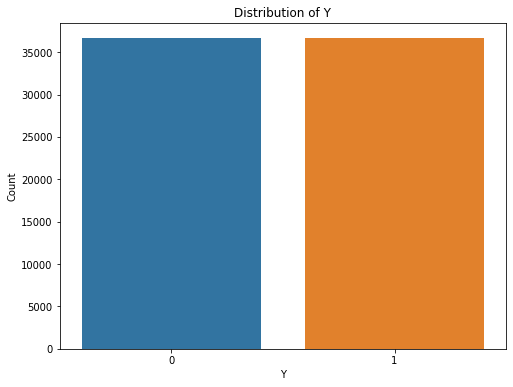

In [84]:
# countplot of dependent column y

plt.figure(figsize = (8,6))
sns.countplot(x = y)
plt.xlabel('Y')
plt.ylabel('Count')
plt.title('Distribution of Y')
plt.show()

In [85]:
# Scale the data using Standard Scaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [86]:
# Splitting the data into train and test split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.25, random_state =42)

In [87]:
print(X_train.shape)

(54979, 29)


In [88]:
print(y_train.shape)

(54979,)


In [89]:
print(X_test.shape)

(18327, 29)


In [90]:
print(y_test.shape)

(18327,)


# **Logistic Regression**

In [91]:
# fitting model to logistic regression
logistic_model = LogisticRegression(fit_intercept = True, max_iter = 10000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [92]:
# get the model coefficients
logistic_model.coef_

array([[ 1.65895347e-03, -4.60990689e-01, -1.01109886e-01,
        -1.05913015e-02, -7.61467585e-01, -5.94329756e-01,
        -9.20209602e-01, -4.22359586e-01, -5.39858162e-01,
        -8.27165919e-01, -4.66204912e-01, -4.17324875e-01,
        -6.02042197e-01, -1.89411167e-01, -7.59826881e-01,
        -4.13443908e-01, -2.02784035e-01, -7.87850735e-01,
        -5.16738558e-01, -3.24621761e-01, -2.28882382e-01,
        -8.03319412e-01, -1.12594218e-01,  1.16843732e-01,
        -1.76328654e+00, -1.68045480e+00, -1.22922411e-01,
        -5.52924546e-01, -4.55556927e-01]])

In [93]:
#Get the model intercept
logistic_model.intercept_

array([0.0973961])

In [94]:
#Get the predicted probabilities
train_preds = logistic_model.predict_proba(X_train)
test_preds = logistic_model.predict_proba(X_test)


In [95]:
# Get the predicted classes
train_class_preds = logistic_model.predict(X_train)
test_class_preds = logistic_model.predict(X_test)

In [96]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print(round((train_accuracy), 4)) 
print(round((test_accuracy), 4))

0.8651
0.8642


In [97]:
log_train_preds = logistic_model.predict_proba(X_train)[:,1]
log_test_preds = logistic_model.predict_proba(X_test)[:,1]

In [98]:
from sklearn.metrics import roc_auc_score

print(round(roc_auc_score(y_train,log_train_preds), 4))
print(round(roc_auc_score(y_test,log_test_preds), 4))


0.9335
0.9337


In [99]:
from sklearn.metrics import classification_report
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.89      0.85      0.87     29001
          no       0.84      0.89      0.86     25978

    accuracy                           0.87     54979
   macro avg       0.87      0.87      0.86     54979
weighted avg       0.87      0.87      0.87     54979



              precision    recall  f1-score   support

         yes       0.90      0.84      0.87      9709
          no       0.83      0.89      0.86      8618

    accuracy                           0.86     18327
   macro avg       0.86      0.87      0.86     18327
weighted avg       0.87      0.86      0.86     18327



In [100]:
# Hyperprarameter tuning using GridSearchCV
logistic_grid = LogisticRegression()
parameters = {'C': [1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10,100,1e-3,1e+4,1e+5,1e+6]}
log_grid = GridSearchCV(logistic_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END .......................................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5,
                               10, 100, 0.001, 10000.0, 100000.0, 1000000.0]},
             scoring='roc_auc', verbose=2)

In [101]:
log_optimal_model = log_grid.best_estimator_

In [102]:
# Making predictions on train and test data

train_class_preds = log_optimal_model.predict(X_train)
test_class_preds = log_optimal_model.predict(X_test)

In [103]:
# Calculating accuracy on train and test
log_train_accuracy = accuracy_score(y_train,train_class_preds)
log_test_accuracy = accuracy_score(y_test,test_class_preds)

print(round((log_train_accuracy),4))
print(round((log_test_accuracy), 4))


0.8651
0.8642


In [104]:
log_optimal_train_preds = log_optimal_model.predict_proba(X_train)[:,1]
log_optimal_test_preds = log_optimal_model.predict_proba(X_test)[:,1]

In [105]:
print(round((roc_auc_score(y_train,log_optimal_train_preds)), 4))
print(round((roc_auc_score(y_test,log_optimal_test_preds)), 4))

0.9335
0.9337


In [106]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))


              precision    recall  f1-score   support

         yes       0.89      0.85      0.87     29001
          no       0.84      0.89      0.86     25978

    accuracy                           0.87     54979
   macro avg       0.87      0.87      0.86     54979
weighted avg       0.87      0.87      0.87     54979



              precision    recall  f1-score   support

         yes       0.90      0.84      0.87      9709
          no       0.83      0.89      0.86      8618

    accuracy                           0.86     18327
   macro avg       0.86      0.87      0.86     18327
weighted avg       0.87      0.86      0.86     18327



# **Decision Tree**

In [107]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [108]:
# Get the predicted classes
train_class_preds = tree_model.predict(X_train)
test_class_preds = tree_model.predict(X_test)

In [109]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print(round((train_accuracy), 4))
print(round((test_accuracy), 4))

0.9911
0.8796


In [110]:
tree_train_preds = tree_model.predict_proba(X_train)[:,1]
tree_test_preds = tree_model.predict_proba(X_test)[:,1]

In [111]:
print(round((roc_auc_score(y_train,tree_train_preds)), 4))
print(round((roc_auc_score(y_test,tree_test_preds)), 4))

0.9998
0.8852


In [112]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.99      0.99      0.99     27529
          no       0.99      0.99      0.99     27450

    accuracy                           0.99     54979
   macro avg       0.99      0.99      0.99     54979
weighted avg       0.99      0.99      0.99     54979



              precision    recall  f1-score   support

         yes       0.86      0.89      0.88      8804
          no       0.90      0.87      0.88      9523

    accuracy                           0.88     18327
   macro avg       0.88      0.88      0.88     18327
weighted avg       0.88      0.88      0.88     18327



In [113]:
#Hyperprarameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
tree_grid = DecisionTreeClassifier()
parameters = {
                'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]

}
tree_grid = GridSearchCV(tree_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.1s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='roc_auc', verbose=2)

In [114]:
tree_optimal_model = tree_grid.best_estimator_

In [115]:
# Making predictions on train and test data

train_class_preds = tree_optimal_model.predict(X_train)
test_class_preds = tree_optimal_model.predict(X_test)

In [116]:
# Calculating accuracy on train and test
tree_train_accuracy = accuracy_score(y_train,train_class_preds)
tree_test_accuracy = accuracy_score(y_test,test_class_preds)

print(round((tree_train_accuracy),4))
print(round((tree_test_accuracy), 4))

0.8453
0.8334


In [117]:
tree_optimal_train_preds = tree_optimal_model.predict_proba(X_train)[:,1]
tree_optimal_test_preds = tree_optimal_model.predict_proba(X_test)[:,1]

In [118]:
print(round((roc_auc_score(y_train,tree_optimal_train_preds)), 4))
print(round((roc_auc_score(y_test,tree_optimal_test_preds)), 4))

0.9227
0.909


In [119]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.88      0.82      0.85     29339
          no       0.81      0.87      0.84     25640

    accuracy                           0.85     54979
   macro avg       0.85      0.85      0.85     54979
weighted avg       0.85      0.85      0.85     54979



              precision    recall  f1-score   support

         yes       0.87      0.81      0.84      9788
          no       0.80      0.86      0.83      8539

    accuracy                           0.83     18327
   macro avg       0.83      0.84      0.83     18327
weighted avg       0.84      0.83      0.83     18327



In [120]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [121]:
features.columns

Index(['balance', 'campaign', 'pdays', 'previous', 'marital_married',
       'marital_single', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_telephone', 'contact_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'was_contacted', 'is_default', 'is_housing', 'is_loan'],
      dtype='object')

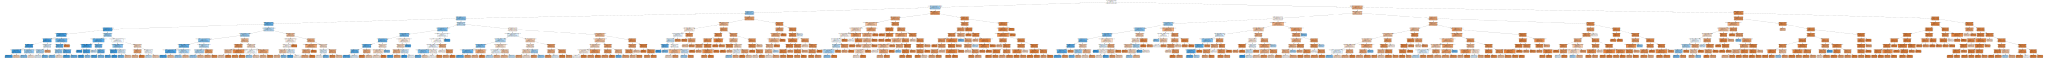

<Figure size 144x144 with 0 Axes>

In [122]:
plt.figure(figsize=(2,2))
graph = Source(tree.export_graphviz(tree_optimal_model, out_file=None, feature_names=features.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

In [123]:
importances = tree_optimal_model.feature_importances_

importance_dict_gb = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_gb_df = pd.DataFrame(importance_dict_gb)
importance_gb_df['Feature Importance'] = round(importance_gb_df['Feature Importance'],2)
fim_gb_df = importance_gb_df.sort_values(by=['Feature Importance'],ascending=False)
fim_gb_df

,Feature,Feature Importance
27,is_housing,0.27
21,contact_unknown,0.16
5,marital_single,0.09
4,marital_married,0.08
28,is_loan,0.07
1,campaign,0.06
0,balance,0.04
14,job_technician,0.04
6,job_blue-collar,0.04
17,education_secondary,0.03


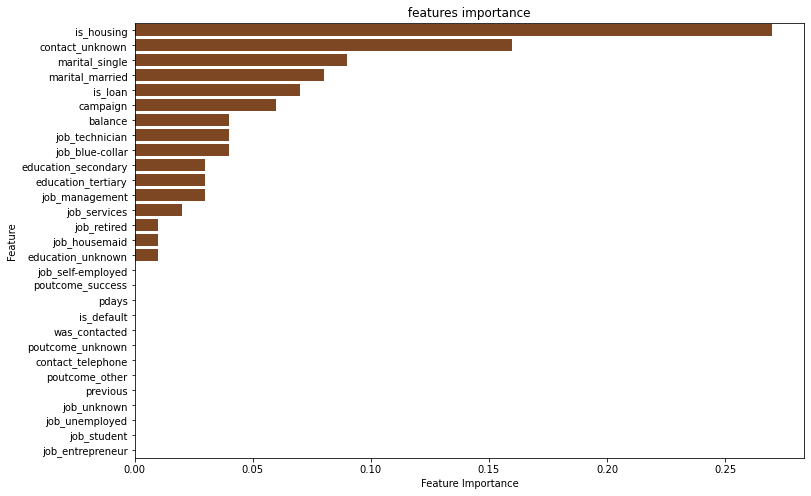

In [124]:
plt.figure(figsize=(12,8))
plt.title(' features importance ')
sns.barplot(x='Feature Importance', y="Feature", color = 'saddlebrown', data=fim_gb_df)
plt.show()

# **XGBoost Classifier**

In [125]:
import xgboost as xgb

In [126]:
XGBoost_model = xgb.XGBClassifier()
XGBoost_model.fit(X_train, y_train)

XGBClassifier()

In [127]:
# Get the predicted classes

train_class_preds = XGBoost_model.predict(X_train)
test_class_preds = XGBoost_model.predict(X_test)

In [128]:
# Get the Accuracy classes

train_accuracy = accuracy_score(train_class_preds, y_train)
test_accuracy = accuracy_score(test_class_preds, y_test)

In [129]:
print(round((train_accuracy), 4))

0.8659


In [130]:
print(round((test_accuracy), 4))

0.861


In [131]:
XGBoost_train_preds =  XGBoost_model.predict_proba(X_train)[:, 1]
XGBoost_test_preds =  XGBoost_model.predict_proba(X_test)[:, 1]

In [132]:
print(round((roc_auc_score(y_train,XGBoost_train_preds )), 4))

0.9352


In [133]:
print(round((roc_auc_score(y_test,XGBoost_test_preds )), 4))

0.9339


In [134]:
target_names = ['yes', 'no']
print(classification_report(train_class_preds, y_train, target_names= target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names= target_names))

              precision    recall  f1-score   support

         yes       0.88      0.86      0.87     28277
          no       0.85      0.88      0.86     26702

    accuracy                           0.87     54979
   macro avg       0.87      0.87      0.87     54979
weighted avg       0.87      0.87      0.87     54979



              precision    recall  f1-score   support

         yes       0.88      0.85      0.86      9454
          no       0.84      0.87      0.86      8873

    accuracy                           0.86     18327
   macro avg       0.86      0.86      0.86     18327
weighted avg       0.86      0.86      0.86     18327



In [135]:
# Hyperparameter tuning using GridSearch
XGBoost_grid = xgb.XGBClassifier()
parameters = {
                'n_estimators' : [50,80,100,125],
              'max_depth' : [3,5,7,9],
              'learning_rate': [0.01,0.1,0.3,0.5]
              }
XGBoost_grid = GridSearchCV(XGBoost_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
XGBoost_grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   2.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   3.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   3.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   3.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   3.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   3.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 80, 100, 125]},
             scoring='roc_auc', verbose=2)

In [136]:
XGBoost_optimal_model =XGBoost_grid.best_estimator_

In [137]:
# Making predictions on train and test data

train_class_preds = XGBoost_optimal_model.predict(X_train)
test_class_preds = XGBoost_optimal_model.predict(X_test)

In [138]:
# Calculating accuracy on train and test

XGBoost_train_accuracy = accuracy_score(y_train,train_class_preds)
XGBoost_test_accuracy = accuracy_score(y_test,test_class_preds)

In [139]:
print(round((XGBoost_train_accuracy), 4))
print(round((XGBoost_test_accuracy), 4))

0.9535
0.9067


In [140]:
XGBoost_optimal_train_preds = XGBoost_optimal_model.predict_proba(X_train)[:, 1]
XGBoost_optimal_test_preds = XGBoost_optimal_model.predict_proba(X_test)[:, 1]

In [141]:
target_names = ['yes', 'no']
print(classification_report( train_class_preds, y_train, target_names = target_names))
print('\n')
print(classification_report( test_class_preds, y_test, target_names = target_names))

              precision    recall  f1-score   support

         yes       0.96      0.94      0.95     28105
          no       0.94      0.96      0.95     26874

    accuracy                           0.95     54979
   macro avg       0.95      0.95      0.95     54979
weighted avg       0.95      0.95      0.95     54979



              precision    recall  f1-score   support

         yes       0.92      0.89      0.91      9402
          no       0.89      0.92      0.91      8925

    accuracy                           0.91     18327
   macro avg       0.91      0.91      0.91     18327
weighted avg       0.91      0.91      0.91     18327



In [142]:
importances = XGBoost_optimal_model.feature_importances_

importance_dict_gb = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_gb_df = pd.DataFrame(importance_dict_gb)
importance_gb_df['Feature Importance'] = round(importance_gb_df['Feature Importance'],2)
fim_gb_df = importance_gb_df.sort_values(by=['Feature Importance'],ascending=False)
fim_gb_df

,Feature,Feature Importance
21,contact_unknown,0.14
15,job_unemployed,0.09
8,job_housemaid,0.08
27,is_housing,0.06
11,job_self-employed,0.06
28,is_loan,0.05
7,job_entrepreneur,0.05
10,job_retired,0.05
12,job_services,0.04
19,education_unknown,0.04


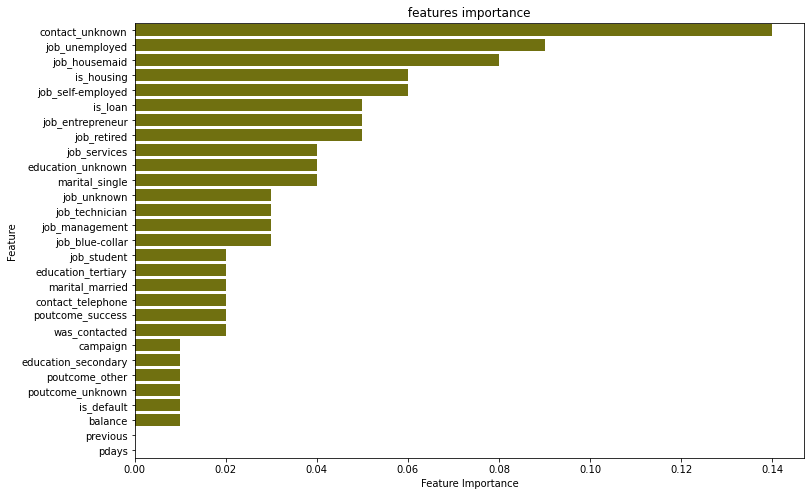

In [143]:
plt.figure(figsize=(12,8))
plt.title(' features importance ')
sns.barplot(x='Feature Importance',y="Feature", color = 'olive', data=fim_gb_df)

# **K-Nearest Neighbors (KNN)**

In [155]:
# Setup a knn classifier with k neighbors
KNN_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [157]:
train_class_preds = KNN_model.predict(X_train)
test_class_preds = KNN_model.predict(X_test)

In [166]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

In [167]:
print(round((train_accuracy),4))
print(round((test_accuracy),4))

0.9297
0.8855


In [169]:
KNN_train_preds = KNN_model.predict_proba(X_train)[:,1]
KNN_test_preds = KNN_model.predict_proba(X_test)[:,1]

In [170]:
print(round((roc_auc_score(y_train,KNN_train_preds)), 4))
print(round((roc_auc_score(y_test,KNN_test_preds)), 4))


0.9843
0.9249


In [171]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.93      0.93      0.93     27732
          no       0.93      0.93      0.93     27247

    accuracy                           0.93     54979
   macro avg       0.93      0.93      0.93     54979
weighted avg       0.93      0.93      0.93     54979



              precision    recall  f1-score   support

         yes       0.88      0.89      0.88      9055
          no       0.89      0.88      0.89      9272

    accuracy                           0.89     18327
   macro avg       0.89      0.89      0.89     18327
weighted avg       0.89      0.89      0.89     18327



In [181]:
#Hyperprarameter tuning using GridSearchCV

KNN_grid = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,50,2)}
KNN_grid = GridSearchCV(KNN_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
KNN_grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ......................................n_neighbors=1; total time=   5.1s
[CV] END ......................................n_neighbors=1; total time=   5.0s
[CV] END ......................................n_neighbors=1; total time=   5.0s
[CV] END ......................................n_neighbors=1; total time=   5.0s
[CV] END ......................................n_neighbors=1; total time=   5.0s
[CV] END ......................................n_neighbors=3; total time=   6.8s
[CV] END ......................................n_neighbors=3; total time=   6.7s
[CV] END ......................................n_neighbors=3; total time=   6.8s
[CV] END ......................................n_neighbors=3; total time=   6.8s
[CV] END ......................................n_neighbors=3; total time=   6.7s
[CV] END ......................................n_neighbors=5; total time=  10.3s
[CV] END ......................................

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='roc_auc', verbose=2)

In [182]:
KNN_grid.best_estimator_

KNeighborsClassifier(n_neighbors=23)

In [184]:
KNN_optimal_model = KNN_grid.best_estimator_

In [185]:
# Making predictions on train and test data

train_class_preds = KNN_optimal_model.predict(X_train)
test_class_preds = KNN_optimal_model.predict(X_test)

In [186]:
# Calculating accuracy on train and test
KNN_train_accuracy = accuracy_score(y_train,train_class_preds)
KNN_test_accuracy = accuracy_score(y_test,test_class_preds)

In [187]:
print(round((KNN_train_accuracy), 4))
print(round((KNN_test_accuracy), 4))

0.8823
0.8732


In [188]:
KNN_optimal_train_preds = KNN_optimal_model.predict_proba(X_train)[:,1]
KNN_optimal_test_preds = KNN_optimal_model.predict_proba(X_test)[:,1]

In [189]:
print(round((roc_auc_score(y_train,KNN_optimal_train_preds)), 4))
print(round((roc_auc_score(y_test,KNN_optimal_test_preds)), 4))

0.9526
0.9398


In [190]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.91      0.86      0.89     29021
          no       0.85      0.90      0.88     25958

    accuracy                           0.88     54979
   macro avg       0.88      0.88      0.88     54979
weighted avg       0.88      0.88      0.88     54979

              precision    recall  f1-score   support

         yes       0.91      0.85      0.88      9724
          no       0.84      0.90      0.87      8603

    accuracy                           0.87     18327
   macro avg       0.87      0.87      0.87     18327
weighted avg       0.88      0.87      0.87     18327

